# Climate change indicators


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
try:
    from prophet import Prophet
except ImportError:
    !pip install prophet
    from prophet import Prophet

In [33]:
import pandas as pd

# File paths
file_path1 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\all countries global temperature.csv"
file_path2 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\Average Surface Temperature.csv"

# Read the CSV files
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Display the first few rows of each dataframe
print("Data from all countries global temperature.csv:")
print(df1.head())

print("\nData from Average Surface Temperature.csv:")
print(df2.head())

Data from all countries global temperature.csv:
   ObjectId                  Country Name            Unit  \
0         1  Afghanistan, Islamic Rep. of  Degree Celsius   
1         2                       Albania  Degree Celsius   
2         3                       Algeria  Degree Celsius   
3         4                American Samoa  Degree Celsius   
4         5      Andorra, Principality of  Degree Celsius   

                      Change    1970   1971   1972   1973   1974   1975  ...  \
0  Surface Temperature Change  0.898  0.652 -1.089  0.262 -0.470 -0.468  ...   
1  Surface Temperature Change -0.119 -0.200 -0.077 -0.299 -0.134 -0.203  ...   
2  Surface Temperature Change  0.114 -0.380 -0.342 -0.028 -0.502 -0.554  ...   
3  Surface Temperature Change -0.036 -0.473 -0.070  0.322 -0.317 -0.128  ...   
4  Surface Temperature Change  0.081 -0.355 -0.526 -0.010 -0.412  0.207  ...   

    2012   2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  0.234  1.308  0.457  1.101 

## Loading the dataset

In [34]:
# Load the datasets
df1 = pd.read_csv(file_path1)  # All countries global temperature
df2 = pd.read_csv(file_path2)  # Average Surface Temperature

#### Basic EDA for df1 (All Countries Global Temperature)

In [35]:
print("Shape of df1:", df1.shape)  # Rows and columns
print("\nColumns in df1:", df1.columns.tolist())  # Column names
print("\nFirst 5 rows of df1:")
print(df1.head())
print("\nLast 5 rows of df1:")
print(df1.tail())

Shape of df1: (227, 56)

Columns in df1: ['ObjectId', 'Country Name', 'Unit', 'Change ', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First 5 rows of df1:
   ObjectId                  Country Name            Unit  \
0         1  Afghanistan, Islamic Rep. of  Degree Celsius   
1         2                       Albania  Degree Celsius   
2         3                       Algeria  Degree Celsius   
3         4                American Samoa  Degree Celsius   
4         5      Andorra, Principality of  Degree Celsius   

                      Change    1970   1971   1972   1973   1974   1975  ...  \
0  Surface Temperature Cha

In [36]:
# Shape of the dataset
print("Shape of df1:", df1.shape)  # (227 rows, 56 columns)

# Column names
print("\nColumns in df1:", df1.columns.tolist())

# First 5 rows
print("\nFirst 5 rows of df1:")
print(df1.head())

# Last 5 rows
print("\nLast 5 rows of df1:")
print(df1.tail())

Shape of df1: (227, 56)

Columns in df1: ['ObjectId', 'Country Name', 'Unit', 'Change ', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First 5 rows of df1:
   ObjectId                  Country Name            Unit  \
0         1  Afghanistan, Islamic Rep. of  Degree Celsius   
1         2                       Albania  Degree Celsius   
2         3                       Algeria  Degree Celsius   
3         4                American Samoa  Degree Celsius   
4         5      Andorra, Principality of  Degree Celsius   

                      Change    1970   1971   1972   1973   1974   1975  ...  \
0  Surface Temperature Cha

In [37]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns in df1:")
print(df1.describe())


Summary statistics for numerical columns in df1:
         ObjectId        1970        1971        1972        1973        1974  \
count  227.000000  190.000000  193.000000  195.000000  195.000000  193.000000   
mean   114.013216    0.097689   -0.190124   -0.075354    0.230226   -0.168347   
std     65.696573    0.354175    0.232647    0.385045    0.332191    0.291944   
min      1.000000   -1.284000   -0.879000   -1.796000   -0.992000   -0.953000   
25%     57.500000   -0.038750   -0.307000   -0.194500    0.047000   -0.335000   
50%    114.000000    0.133000   -0.206000   -0.026000    0.245000   -0.213000   
75%    170.500000    0.293750   -0.069000    0.113500    0.452500   -0.060000   
max    230.000000    0.978000    0.683000    0.942000    1.147000    1.125000   

             1975        1976        1977        1978  ...        2012  \
count  190.000000  192.000000  191.000000  192.000000  ...  214.000000   
mean    -0.024305   -0.243792    0.170592    0.079359  ...    0.887421  

In [38]:
# Missing values in df1
print("\nMissing values in df1:")
print(df1.isnull().sum())


Missing values in df1:
ObjectId         0
Country Name     0
Unit             0
Change           0
1970            37
1971            34
1972            32
1973            32
1974            34
1975            37
1976            35
1977            36
1978            35
1979            36
1980            34
1981            35
1982            35
1983            38
1984            37
1985            37
1986            36
1987            36
1988            36
1989            35
1990            36
1991            37
1992            16
1993            18
1994            18
1995            16
1996            16
1997            19
1998            15
1999            17
2000            16
2001            18
2002            15
2003            12
2004            13
2005            14
2006            11
2007            10
2008            14
2009            13
2010            12
2011            10
2012            13
2013            11
2014            11
2015            11
2016            12
2017   

In [39]:
# Unique values in 'Country Name'
print("\nNumber of unique countries:", df1['Country Name'].nunique())

# Unique values in 'Unit'
print("\nUnique values in 'Unit':", df1['Unit'].unique())

# Unique values in 'Change '
print("\nUnique values in 'Change ':", df1['Change '].unique())


Number of unique countries: 227

Unique values in 'Unit': ['Degree Celsius']

Unique values in 'Change ': ['Surface Temperature Change']


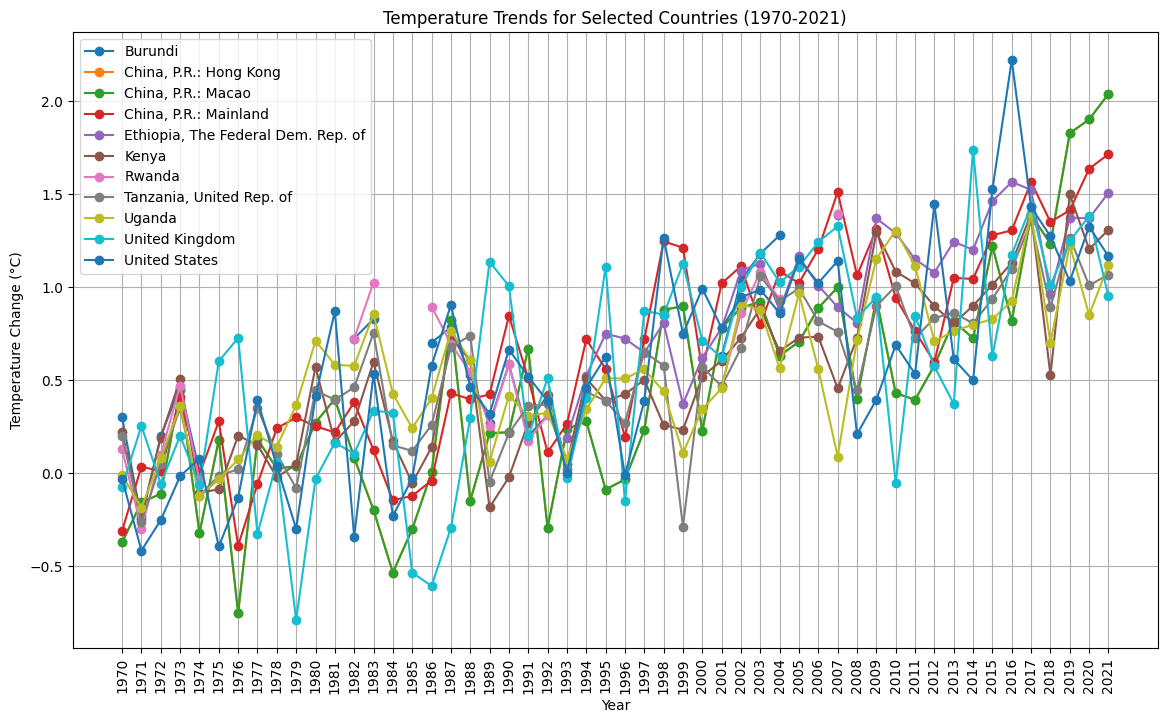

In [ ]:
import matplotlib.pyplot as plt

# Select a few countries for visualization
countries = [
    "Burundi",
    "China, P.R.: Hong Kong",
    "China, P.R.: Macao",
    "China, P.R.: Mainland",
    "Ethiopia, The Federal Dem. Rep. of",
    "Kenya",
    "Rwanda",
    "Tanzania, United Rep. of",
    "Uganda",
    "United Kingdom",
    "United States"
]
# Plot temperature trends for selected countries
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = df1[df1['Country Name'] == country]
    years = df1.columns[4:]  # Extract year columns (1970 to 2021)
    temperatures = country_data.iloc[:, 4:].values.flatten()
    plt.plot(years, temperatures, marker='o', label=country)

plt.title("Temperature Trends for Selected Countries (1970-2021)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

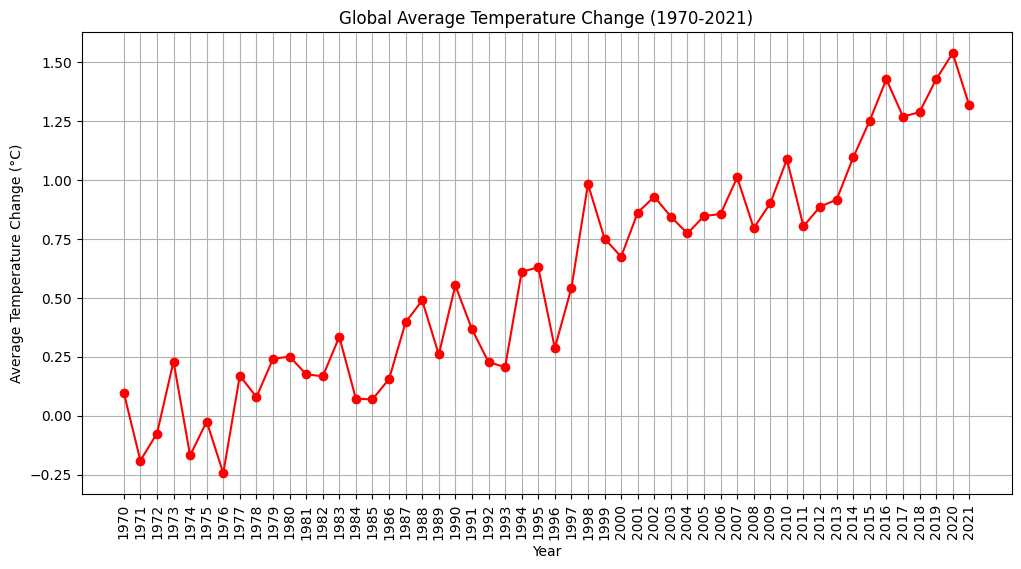

In [41]:
# Calculate global average temperature change for each year
global_avg_temps = df1.iloc[:, 4:].mean()

# Plot global average temperature trends
plt.figure(figsize=(12, 6))
plt.plot(global_avg_temps.index, global_avg_temps.values, marker='o', color='red')
plt.title("Global Average Temperature Change (1970-2021)")
plt.xlabel("Year")
plt.ylabel("Average Temperature Change (°C)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

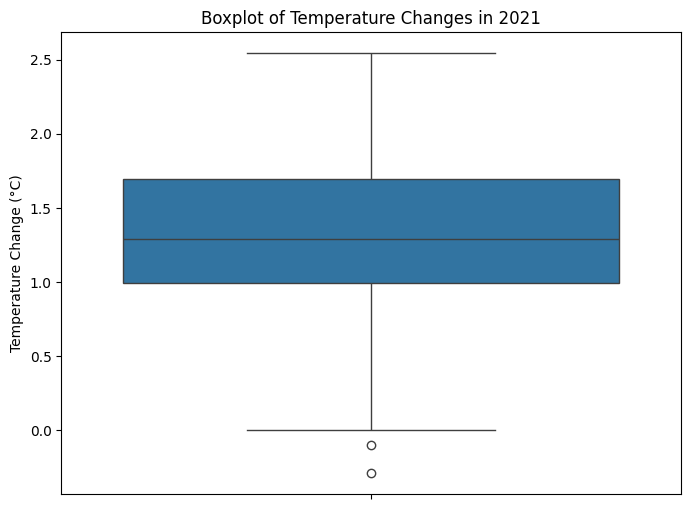

In [42]:
# Boxplot for temperature changes in 2021
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, y='2021')
plt.title("Boxplot of Temperature Changes in 2021")
plt.ylabel("Temperature Change (°C)")
plt.show()

In [43]:
print("Shape of df2:", df2.shape)  # Rows and columns
print("\nColumns in df2:", df2.columns.tolist())  # Column names
print("\nFirst 5 rows of df2:")
print(df2.head())
print("\nLast 5 rows of df2:")
print(df2.tail())

Shape of df2: (199290, 6)

Columns in df2: ['Country Name', 'Code', 'year', 'Day', 'Average surface temperature', 'Average surface temperature.1']

First 5 rows of df2:
  Country Name Code  year        Day  Average surface temperature  \
0  Afghanistan  AFG  1940  1/15/1940                    -2.032494   
1  Afghanistan  AFG  1940  2/15/1940                    -0.733503   
2  Afghanistan  AFG  1940  3/15/1940                     1.999134   
3  Afghanistan  AFG  1940  4/15/1940                    10.199754   
4  Afghanistan  AFG  1940  5/15/1940                    17.942135   

   Average surface temperature.1  
0                      11.327695  
1                      11.327695  
2                      11.327695  
3                      11.327695  
4                      11.327695  

Last 5 rows of df2:
       Country Name Code  year         Day  Average surface temperature  \
199285     Zimbabwe  ZWE  2024  10/15/2024                    24.407030   
199286     Zimbabwe  ZWE  2024  11/

In [44]:
# Shape of the dataset
print("Shape of df2:", df2.shape)  # (199290 rows, 6 columns)

# Column names
print("\nColumns in df2:", df2.columns.tolist())

# First 5 rows
print("\nFirst 5 rows of df2:")
print(df2.head())

# Last 5 rows
print("\nLast 5 rows of df2:")
print(df2.tail())

Shape of df2: (199290, 6)

Columns in df2: ['Country Name', 'Code', 'year', 'Day', 'Average surface temperature', 'Average surface temperature.1']

First 5 rows of df2:
  Country Name Code  year        Day  Average surface temperature  \
0  Afghanistan  AFG  1940  1/15/1940                    -2.032494   
1  Afghanistan  AFG  1940  2/15/1940                    -0.733503   
2  Afghanistan  AFG  1940  3/15/1940                     1.999134   
3  Afghanistan  AFG  1940  4/15/1940                    10.199754   
4  Afghanistan  AFG  1940  5/15/1940                    17.942135   

   Average surface temperature.1  
0                      11.327695  
1                      11.327695  
2                      11.327695  
3                      11.327695  
4                      11.327695  

Last 5 rows of df2:
       Country Name Code  year         Day  Average surface temperature  \
199285     Zimbabwe  ZWE  2024  10/15/2024                    24.407030   
199286     Zimbabwe  ZWE  2024  11/

In [45]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns in df2:")
print(df2.describe())


Summary statistics for numerical columns in df2:
                year  Average surface temperature  \
count  199290.000000                199290.000000   
mean     1982.084149                    18.066105   
std        24.585286                    10.251394   
min      1940.000000                   -36.240032   
25%      1961.000000                    12.287746   
50%      1982.000000                    22.053738   
75%      2003.000000                    25.317117   
max      2025.000000                    39.889374   

       Average surface temperature.1  
count                  199290.000000  
mean                       18.075053  
std                         8.710005  
min                       -21.529121  
25%                        10.572247  
50%                        21.858255  
75%                        25.143888  
max                        29.794220  


In [46]:
# Missing values in df2
print("\nMissing values in df2:")
print(df2.isnull().sum())


Missing values in df2:
Country Name                     0
Code                             0
year                             0
Day                              0
Average surface temperature      0
Average surface temperature.1    0
dtype: int64


In [47]:
# Unique values in 'Country Name'
print("\nNumber of unique countries:", df2['Country Name'].nunique())

# Unique values in 'Code'
print("\nUnique values in 'Code':", df2['Code'].nunique())

# Unique values in 'year'
print("\nUnique values in 'year':", df2['year'].unique())

# Unique values in 'Day'
print("\nNumber of unique days:", df2['Day'].nunique())


Number of unique countries: 195

Unique values in 'Code': 195

Unique values in 'year': [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025]

Number of unique days: 1022


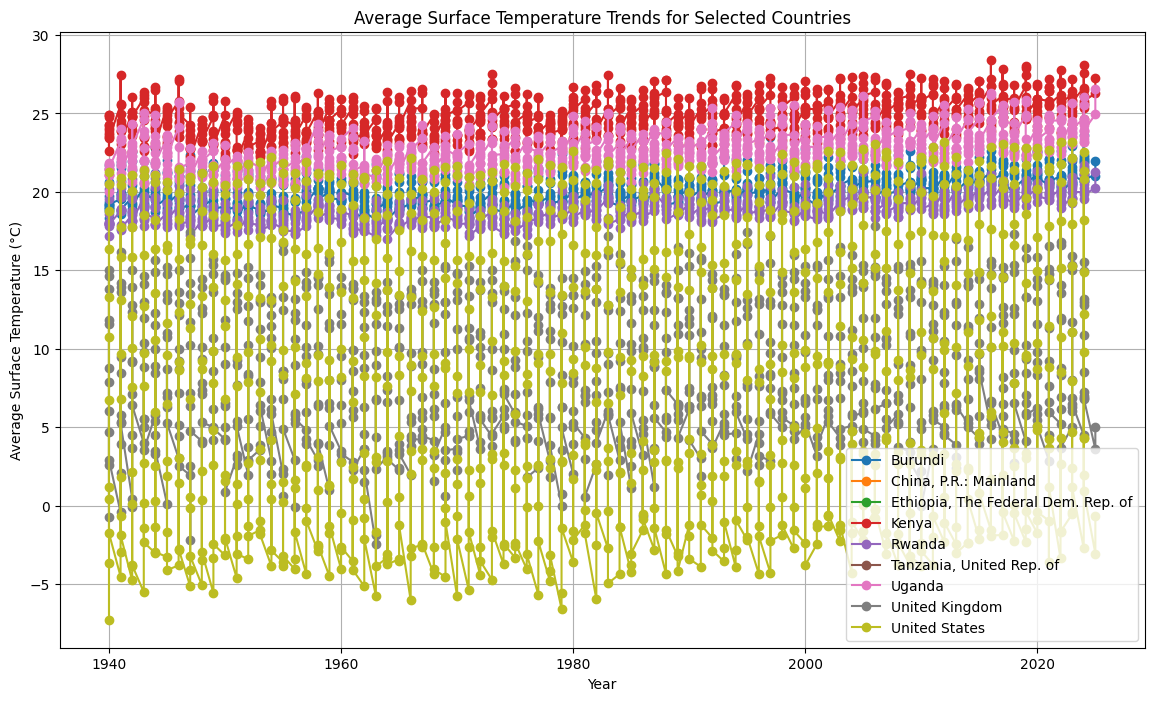

In [48]:
import matplotlib.pyplot as plt

# Select a few countries for visualization
countries = [
    "Burundi",
    "China, P.R.: Mainland",
    "Ethiopia, The Federal Dem. Rep. of",
    "Kenya",
    "Rwanda",
    "Tanzania, United Rep. of",
    "Uganda",
    "United Kingdom",
    "United States"
]

# Plot average surface temperature trends for selected countries
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = df2[df2['Country Name'] == country]
    plt.plot(country_data['year'], country_data['Average surface temperature'], marker='o', label=country)

plt.title("Average Surface Temperature Trends for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Average Surface Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

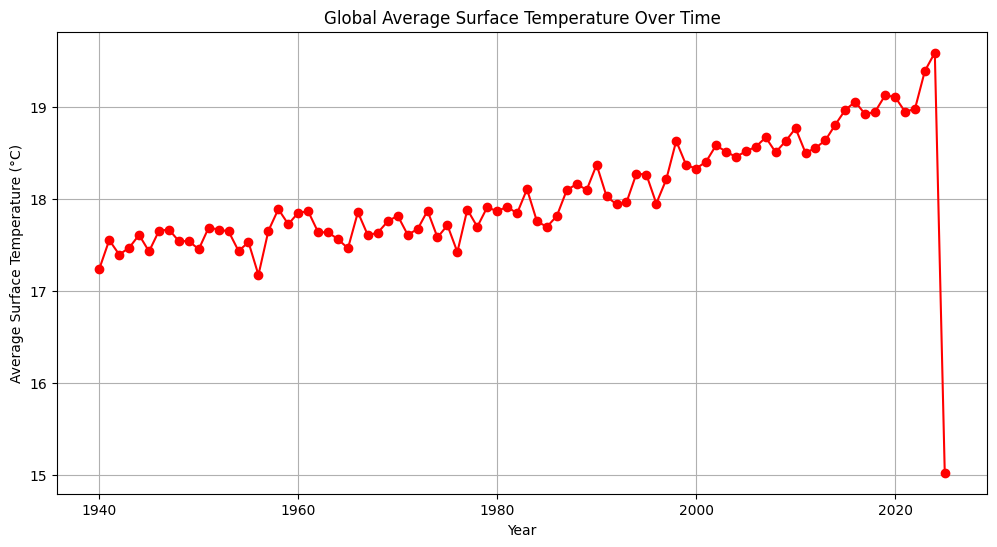

In [49]:
# Calculate global average surface temperature for each year
global_avg_temps = df2.groupby('year')['Average surface temperature'].mean()

# Plot global average surface temperature trends
plt.figure(figsize=(12, 6))
plt.plot(global_avg_temps.index, global_avg_temps.values, marker='o', color='red')
plt.title("Global Average Surface Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Average Surface Temperature (°C)")
plt.grid()
plt.show()

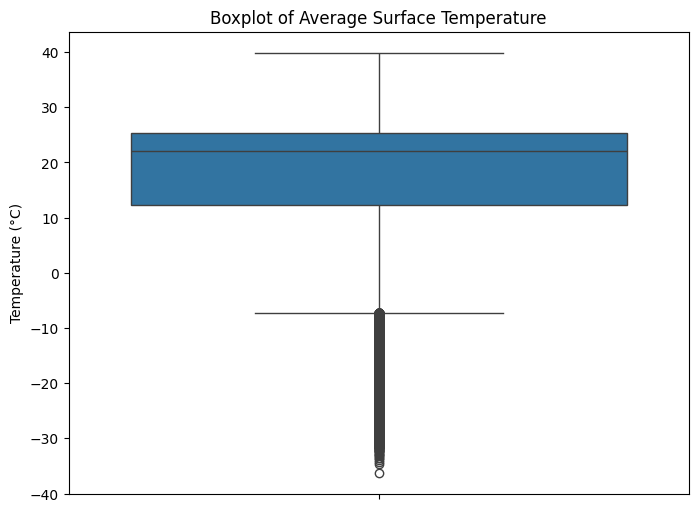

In [50]:
# Boxplot for average surface temperature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2, y='Average surface temperature')
plt.title("Boxplot of Average Surface Temperature")
plt.ylabel("Temperature (°C)")
plt.show()

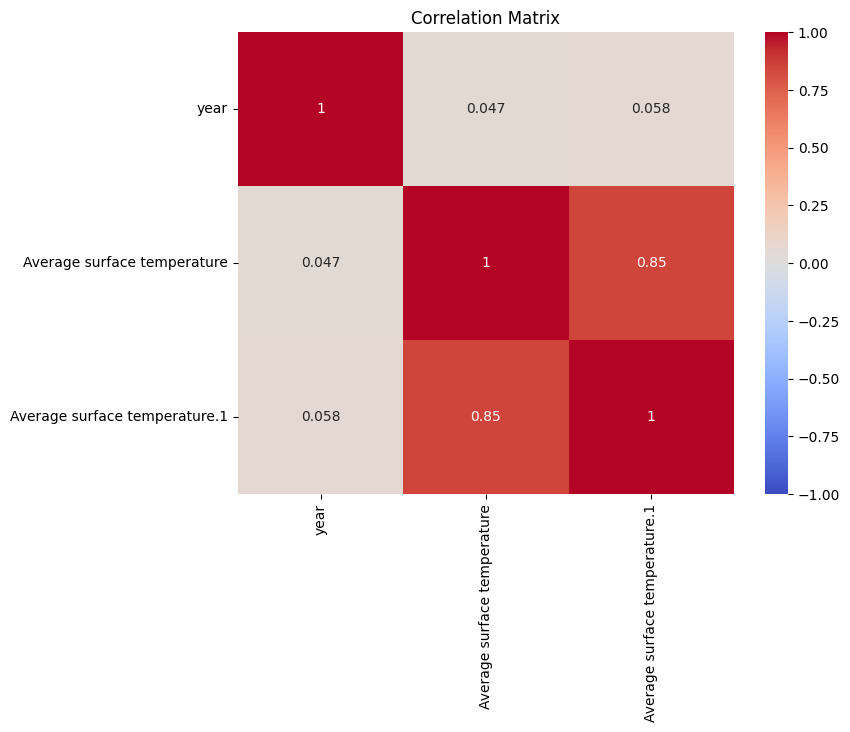

In [51]:
# Correlation matrix
correlation_matrix = df2[['year', 'Average surface temperature', 'Average surface temperature.1']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [52]:
# Select relevant columns
features = df1.iloc[:, 4:]  # Temperature data from 1970 to 2021
target = df1['2021']  # Target variable (temperature change in 2021)

## Model Building

In [53]:
# Check for missing values
print("Missing values in features:", features.isnull().sum().sum())
print("Missing values in target:", target.isnull().sum())

# If there are missing values, impute them (e.g., using mean)
features = features.fillna(features.mean())
target = target.fillna(target.mean())

Missing values in features: 1193
Missing values in target: 13


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (181, 52) (181,)
Testing set shape: (46, 52) (46,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 5.152128723651117e-16
Mean Squared Error (MSE): 4.115212491400934e-31
R-squared (R²): 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R-squared (R²):", r2_rf)

Random Forest - Mean Absolute Error (MAE): 0.018394473791141935
Random Forest - Mean Squared Error (MSE): 0.0011182805854314253
Random Forest - R-squared (R²): 0.9961646898480017


In [ ]:
# Impute missing values with the mean of each column
X_2022_imputed = X_2022.fillna(X_2022.mean())

# Verify that there are no missing values
print("Missing values after imputation:")
print(X_2022_imputed.isnull().sum())

NameError: name 'X_2022' is not defined

In [ ]:
# Split the imputed data into training and testing sets
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X_2022_imputed, target, test_size=0.2, random_state=42)

# Retrain the model
model.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = model.predict(X_test_imputed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 5.152128723651117e-16
Mean Squared Error (MSE): 4.115212491400934e-31
R-squared (R²): 1.0


In [ ]:
# Predict temperature change for 2022 using the imputed data
predictions_2022 = model.predict(X_2022_imputed)

# Add predictions to the dataframe
df1['2022_Predicted'] = predictions_2022

# Display the predictions
print(df1[['Country Name', '2021', '2022_Predicted']].head())

                   Country Name   2021  2022_Predicted
0  Afghanistan, Islamic Rep. of  1.421           1.421
1                       Albania  1.682           1.682
2                       Algeria  2.317           2.317
3                American Samoa  0.653           0.653
4      Andorra, Principality of  1.367           1.367


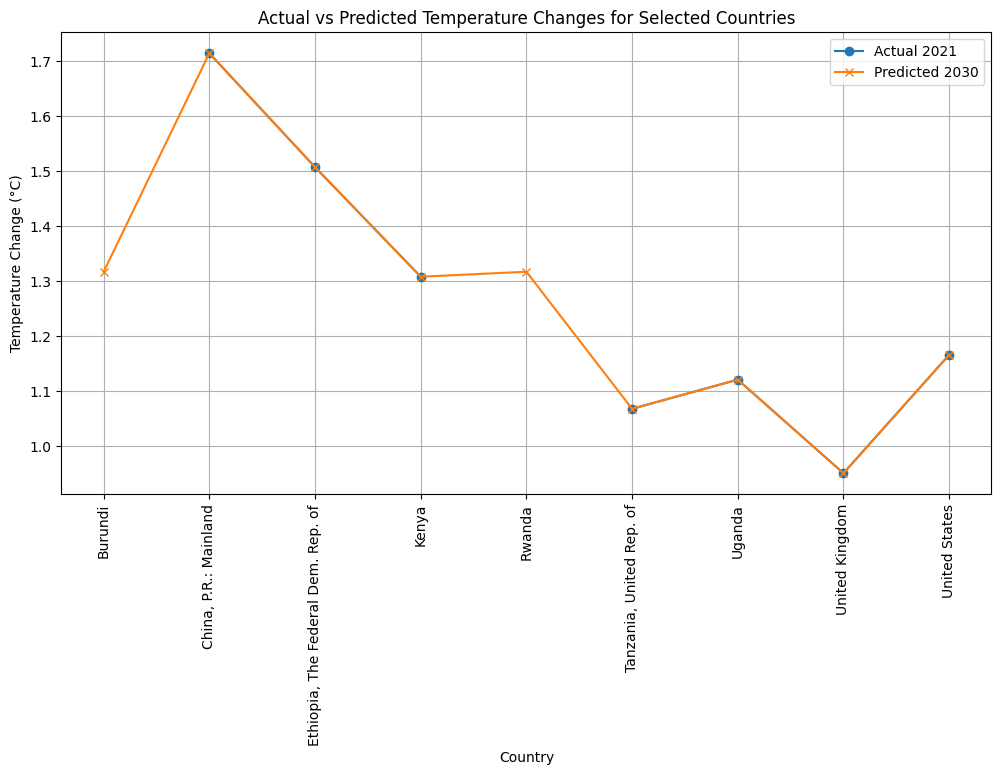

In [ ]:
# List of countries to plot
countries = [
    "Burundi",
    "China, P.R.: Mainland",
    "Ethiopia, The Federal Dem. Rep. of",
    "Kenya",
    "Rwanda",
    "Tanzania, United Rep. of",
    "Uganda",
    "United Kingdom",
    "United States"
]


# Filter the dataframe for selected countries
filtered_df = df1[df1['Country Name'].isin(countries)]

# Plot actual vs predicted values for selected countries
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Country Name'], filtered_df['2021'], label='Actual 2021', marker='o')
plt.plot(filtered_df['Country Name'], filtered_df['2022_Predicted'], label='Predicted 2030', marker='x')
plt.title("Actual vs Predicted Temperature Changes for Selected Countries")
plt.xlabel("Country")
plt.ylabel("Temperature Change (°C)")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

#### Dataframe for future years

In [ ]:
# Create a DataFrame for future years (2022 to 2030)
future_years = pd.DataFrame({'Year': range(2022, 2031)})

# Add a placeholder column for predictions
future_years['Temperature Change'] = np.nan

In [ ]:
# Remove rows where y has NaN values
valid_indices = ~np.isnan(y)
X = X[valid_indices]
y = y[valid_indices]

In [ ]:
# Impute NaN values in y with the mean
y = np.nan_to_num(y, nan=np.nanmean(y))

In [ ]:
# Remove rows where y has NaN values
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

In [ ]:
# Impute NaN values in y with the mean
y = np.nan_to_num(y, nan=np.nanmean(y))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Initialize a dictionary to store predictions
predictions = {}

# Iterate over each country
for country in df1['Country Name'].unique():
    # Filter data for the current country
    country_data = df1[df1['Country Name'] == country]
    
    # Prepare features (years) and target (temperature changes)
    years = np.array(country_data.columns[4:-1], dtype=int)  # Extract years (1970 to 2021) and convert to integers
    X = years.reshape(-1, 1)  # Reshape for the model
    y = country_data.iloc[:, 4:-1].values.flatten()  # Temperature changes
    
    # Handle missing values in y
    mask = ~np.isnan(y)  # Create a mask to filter out NaN values
    X = X[mask]  # Filter X
    y = y[mask]  # Filter y
    
    # Train a new model for the current country
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for future years (2022 to 2030)
    future_years = np.array(range(2022, 2031)).reshape(-1, 1)  # Years to predict
    future_predictions = model.predict(future_years)
    
    # Store predictions
    predictions[country] = future_predictions

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).T
predictions_df.columns = [str(year) for year in range(2022, 2031)]  # Rename columns to years
predictions_df['Country Name'] = predictions_df.index  # Add country names as a column

# Reset index
predictions_df = predictions_df.reset_index(drop=True)

# Display predictions
print(predictions_df.head())

       2022      2023      2024      2025      2026      2027      2028  \
0  1.364385  1.392120  1.419855  1.447590  1.475325  1.503060  1.530795   
1  1.689233  1.731533  1.773833  1.816132  1.858432  1.900732  1.943032   
2  1.854398  1.894196  1.933994  1.973792  2.013590  2.053388  2.093186   
3  0.934669  0.952625  0.970582  0.988538  1.006495  1.024451  1.042408   
4  1.872333  1.911984  1.951636  1.991288  2.030940  2.070592  2.110244   

       2029      2030                  Country Name  
0  1.558530  1.586266  Afghanistan, Islamic Rep. of  
1  1.985332  2.027631                       Albania  
2  2.132985  2.172783                       Algeria  
3  1.060364  1.078321                American Samoa  
4  2.149896  2.189548      Andorra, Principality of  


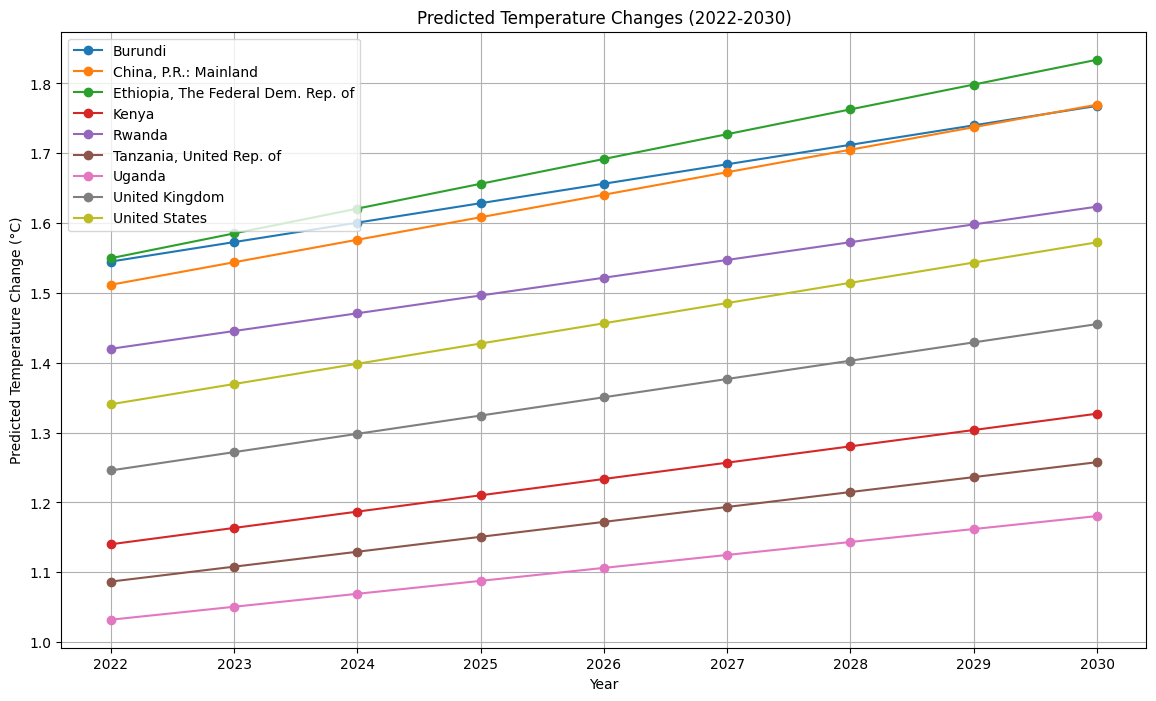

In [ ]:
import matplotlib.pyplot as plt

# List of countries to plot
countries = [
    "Burundi",
    "China, P.R.: Mainland",
    "Ethiopia, The Federal Dem. Rep. of",
    "Kenya",
    "Rwanda",
    "Tanzania, United Rep. of",
    "Uganda",
    "United Kingdom",
    "United States"
]

# Filter predictions for selected countries
filtered_predictions = predictions_df[predictions_df['Country Name'].isin(countries)]

# Plot predictions
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = filtered_predictions[filtered_predictions['Country Name'] == country]
    plt.plot(range(2022, 2031), country_data.iloc[:, :-1].values.flatten(), marker='o', label=country)

plt.title("Predicted Temperature Changes (2022-2030)")
plt.xlabel("Year")
plt.ylabel("Predicted Temperature Change (°C)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save the plot as a PNG file
plt.savefig("temperature_predictions_2022_2030.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
mse_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print average MSE across folds
print("Average MSE:", np.mean(mse_scores))

Average MSE: 0.32740297494046505


In [ ]:
from sklearn.linear_model import Ridge

# Train a Ridge Regression model
model = Ridge(alpha=1.0)  # alpha is the regularization strength
model.fit(X_train, y_train)

Ridge()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model with reduced complexity
model = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=50,
                      random_state=42)

22:24:20 - cmdstanpy - INFO - Chain [1] start processing
22:24:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\chris.mutuku\AppData\Local\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


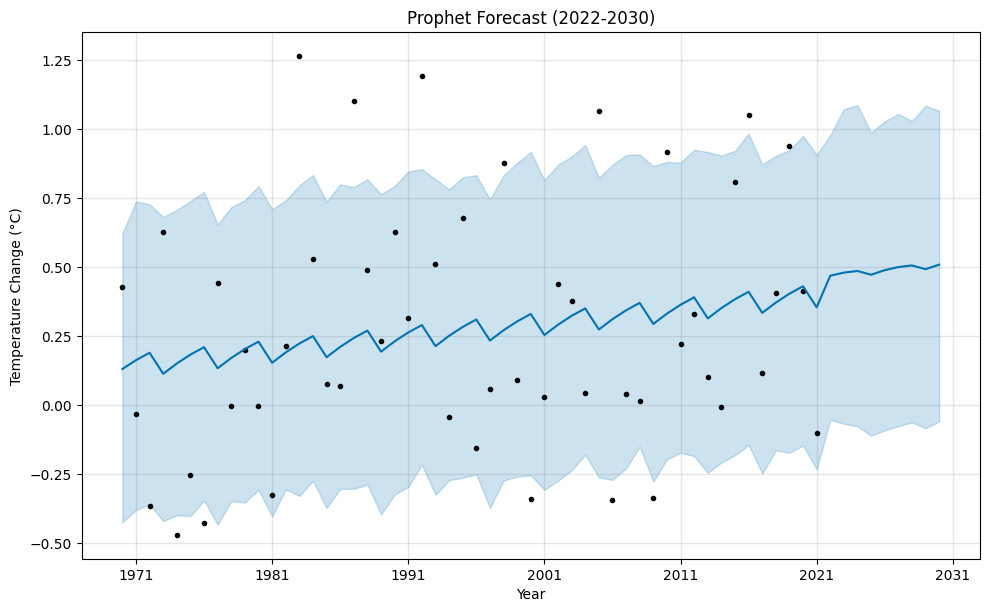

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = pd.DataFrame({
    'ds': pd.to_datetime(years, format='%Y'),  # Year as datetime
    'y': y  # Temperature changes
})

# Train a Prophet model
model = Prophet()
model.fit(prophet_data)

# Make predictions for future years
future = model.make_future_dataframe(periods=9, freq='Y')  # Predict up to 2030
forecast = model.predict(future)

# Plot predictions
model.plot(forecast)
plt.title("Prophet Forecast (2022-2030)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model with early stopping
model = GradientBoostingRegressor(n_estimators=100, validation_fraction=0.2, n_iter_no_change=5, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_iter_no_change=5, random_state=42,
                          validation_fraction=0.2)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", mse_val)

# Evaluate on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test)

Validation MSE: 0.2569057615155112
Test MSE: 0.15190845831774447


In [ ]:
# Convert 'year' column to integer
df2['year'] = df2['year'].astype(int)

# Group by 'Country Name' and 'year', then calculate the mean temperature
df2_yearly = df2.groupby(['Country Name', 'year'])['Average surface temperature'].mean().reset_index()

# Display the aggregated data
print(df2_yearly.head())

  Country Name  year  Average surface temperature
0  Afghanistan  1940                    11.327695
1  Afghanistan  1941                    13.324756
2  Afghanistan  1942                    12.885449
3  Afghanistan  1943                    11.524769
4  Afghanistan  1944                    12.143665


In [ ]:
# Pivot the data to have years as columns and countries as rows
df2_pivot = df2_yearly.pivot(index='Country Name', columns='year', values='Average surface temperature')

# Display the pivoted data
print(df2_pivot.head())

year                 1940       1941       1942       1943       1944  \
Country Name                                                            
Afghanistan     11.327695  13.324756  12.885449  11.524769  12.143665   
Albania         10.648014  10.806884  11.375275  12.312149  11.373272   
Algeria         21.310923  22.005304  21.871951  21.083142  21.874771   
American Samoa  26.434497  26.394511  26.069977  26.089475  26.464406   
Andorra          3.409269   3.381816   4.423492   4.279254   3.574107   

year                 1945       1946       1947       1948       1949  ...  \
Country Name                                                           ...   
Afghanistan     11.366585  12.438738  12.343286  11.804020  10.509593  ...   
Albania         11.386959  12.441034  12.592294  11.546229  11.653842  ...   
Algeria         22.009030  22.072975  22.235087  21.719579  21.761006  ...   
American Samoa  26.288663  26.264356  26.463295  26.309344  26.427205  ...   
Andorra          4.7

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize a dictionary to store predictions
predictions = {}

# Iterate over each country
for country in df2_pivot.index:
    # Prepare features (years) and target (average temperature)
    years = df2_pivot.columns.values.reshape(-1, 1)  # Years as features
    temperatures = df2_pivot.loc[country].values.reshape(-1, 1)  # Temperatures as target
    
    # Remove rows with missing values
    mask = ~np.isnan(temperatures).flatten()
    X = years[mask]
    y = temperatures[mask]
    
    # Train a new model for the current country
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for future years (2022 to 2030)
    future_years = np.array(range(2022, 2031)).reshape(-1, 1)  # Years to predict
    future_predictions = model.predict(future_years)
    
    # Store predictions
    predictions[country] = future_predictions.flatten()

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).T
predictions_df.columns = [str(year) for year in range(2022, 2031)]  # Rename columns to years
predictions_df['Country Name'] = predictions_df.index  # Add country names as a column

# Reset index
predictions_df = predictions_df.reset_index(drop=True)

# Display predictions
print(predictions_df.head())

        2022       2023       2024       2025       2026       2027  \
0  12.382964  12.394670  12.406377  12.418083  12.429789  12.441495   
1  12.718333  12.730777  12.743220  12.755664  12.768107  12.780550   
2  23.935701  23.963268  23.990836  24.018403  24.045971  24.073538   
3  26.887969  26.896902  26.905835  26.914767  26.923700  26.932633   
4   5.621977   5.643837   5.665697   5.687557   5.709417   5.731276   

        2028       2029       2030    Country Name  
0  12.453201  12.464907  12.476614     Afghanistan  
1  12.792994  12.805437  12.817880         Albania  
2  24.101106  24.128673  24.156241         Algeria  
3  26.941566  26.950498  26.959431  American Samoa  
4   5.753136   5.774996   5.796856         Andorra  


In [ ]:
# Display the first few rows of predictions_df
print(predictions_df.head())

# Check if the selected countries exist in predictions_df
print(predictions_df[predictions_df['Country Name'].isin(countries)])

        2022       2023       2024       2025       2026       2027  \
0  12.382964  12.394670  12.406377  12.418083  12.429789  12.441495   
1  12.718333  12.730777  12.743220  12.755664  12.768107  12.780550   
2  23.935701  23.963268  23.990836  24.018403  24.045971  24.073538   
3  26.887969  26.896902  26.905835  26.914767  26.923700  26.932633   
4   5.621977   5.643837   5.665697   5.687557   5.709417   5.731276   

        2028       2029       2030    Country Name  
0  12.453201  12.464907  12.476614     Afghanistan  
1  12.792994  12.805437  12.817880         Albania  
2  24.101106  24.128673  24.156241         Algeria  
3  26.941566  26.950498  26.959431  American Samoa  
4   5.753136   5.774996   5.796856         Andorra  
          2022       2023       2024       2025       2026       2027  \
28   20.893514  20.911642  20.929770  20.947898  20.966027  20.984155   
96   25.625410  25.648343  25.671277  25.694210  25.717144  25.740077   
147  19.761614  19.781223  19.800833

In [ ]:
# Check if the selected countries exist in df2
print(df2['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Heard Island and McDonald Islands' 'Honduras'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Aggregate data to yearly averages
df2_yearly = df2.groupby(['Country Name', 'year'])['Average surface temperature'].mean().reset_index()

# Pivot the data to have years as columns and countries as rows
df2_pivot = df2_yearly.pivot(index='Country Name', columns='year', values='Average surface temperature')

# Initialize a dictionary to store predictions
predictions = {}

# Iterate over each country
for country in df2_pivot.index:
    # Prepare features (years) and target (average temperature)
    years = df2_pivot.columns.values.reshape(-1, 1)  # Years as features
    temperatures = df2_pivot.loc[country].values.reshape(-1, 1)  # Temperatures as target
    
    # Remove rows with missing values
    mask = ~np.isnan(temperatures).flatten()
    X = years[mask]
    y = temperatures[mask]
    
    # Train a new model for the current country
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for future years (2022 to 2030)
    future_years = np.array(range(2022, 2031)).reshape(-1, 1)  # Years to predict
    future_predictions = model.predict(future_years)
    
    # Store predictions
    predictions[country] = future_predictions.flatten()

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).T
predictions_df.columns = [str(year) for year in range(2022, 2031)]  # Rename columns to years
predictions_df['Country Name'] = predictions_df.index  # Add country names as a column

# Reset index
predictions_df = predictions_df.reset_index(drop=True)

# Display predictions
print(predictions_df.head())

        2022       2023       2024       2025       2026       2027  \
0  12.382964  12.394670  12.406377  12.418083  12.429789  12.441495   
1  12.718333  12.730777  12.743220  12.755664  12.768107  12.780550   
2  23.935701  23.963268  23.990836  24.018403  24.045971  24.073538   
3  26.887969  26.896902  26.905835  26.914767  26.923700  26.932633   
4   5.621977   5.643837   5.665697   5.687557   5.709417   5.731276   

        2028       2029       2030    Country Name  
0  12.453201  12.464907  12.476614     Afghanistan  
1  12.792994  12.805437  12.817880         Albania  
2  24.101106  24.128673  24.156241         Algeria  
3  26.941566  26.950498  26.959431  American Samoa  
4   5.753136   5.774996   5.796856         Andorra  


In [ ]:
# Display the first few rows of predictions_df
print(predictions_df.head())

# Check if the selected countries exist in predictions_df
print(predictions_df[predictions_df['Country Name'].isin(countries)])

        2022       2023       2024       2025       2026       2027  \
0  12.382964  12.394670  12.406377  12.418083  12.429789  12.441495   
1  12.718333  12.730777  12.743220  12.755664  12.768107  12.780550   
2  23.935701  23.963268  23.990836  24.018403  24.045971  24.073538   
3  26.887969  26.896902  26.905835  26.914767  26.923700  26.932633   
4   5.621977   5.643837   5.665697   5.687557   5.709417   5.731276   

        2028       2029       2030    Country Name  
0  12.453201  12.464907  12.476614     Afghanistan  
1  12.792994  12.805437  12.817880         Albania  
2  24.101106  24.128673  24.156241         Algeria  
3  26.941566  26.950498  26.959431  American Samoa  
4   5.753136   5.774996   5.796856         Andorra  
          2022       2023       2024       2025       2026       2027  \
28   20.893514  20.911642  20.929770  20.947898  20.966027  20.984155   
96   25.625410  25.648343  25.671277  25.694210  25.717144  25.740077   
147  19.761614  19.781223  19.800833

In [ ]:
# Check if the selected countries exist in df2
print(df2['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Falkland Islands' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Heard Island and McDonald Islands' 'Honduras'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Aggregate data to yearly averages
df2_yearly = df2.groupby(['Country Name', 'year'])['Average surface temperature'].mean().reset_index()

# Pivot the data to have years as columns and countries as rows
df2_pivot = df2_yearly.pivot(index='Country Name', columns='year', values='Average surface temperature')

# Initialize a dictionary to store predictions
predictions = {}

# Iterate over each country
for country in df2_pivot.index:
    # Prepare features (years) and target (average temperature)
    years = df2_pivot.columns.values.reshape(-1, 1)  # Years as features
    temperatures = df2_pivot.loc[country].values.reshape(-1, 1)  # Temperatures as target
    
    # Remove rows with missing values
    mask = ~np.isnan(temperatures).flatten()
    X = years[mask]
    y = temperatures[mask]
    
    # Train a new model for the current country
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for future years (2022 to 2030)
    future_years = np.array(range(2022, 2031)).reshape(-1, 1)  # Years to predict
    future_predictions = model.predict(future_years)
    
    # Store predictions
    predictions[country] = future_predictions.flatten()

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).T
predictions_df.columns = [str(year) for year in range(2022, 2031)]  # Rename columns to years
predictions_df['Country Name'] = predictions_df.index  # Add country names as a column

# Reset index
predictions_df = predictions_df.reset_index(drop=True)

# Display predictions
print(predictions_df.head())

        2022       2023       2024       2025       2026       2027  \
0  12.382964  12.394670  12.406377  12.418083  12.429789  12.441495   
1  12.718333  12.730777  12.743220  12.755664  12.768107  12.780550   
2  23.935701  23.963268  23.990836  24.018403  24.045971  24.073538   
3  26.887969  26.896902  26.905835  26.914767  26.923700  26.932633   
4   5.621977   5.643837   5.665697   5.687557   5.709417   5.731276   

        2028       2029       2030    Country Name  
0  12.453201  12.464907  12.476614     Afghanistan  
1  12.792994  12.805437  12.817880         Albania  
2  24.101106  24.128673  24.156241         Algeria  
3  26.941566  26.950498  26.959431  American Samoa  
4   5.753136   5.774996   5.796856         Andorra  


In [ ]:
# Save predictions to a CSV file
predictions_df.to_csv("average_surface_temperature_predictions_2022_2030.csv", index=False)

In [ ]:
import pandas as pd

# Load predictions from the CSV file
predictions_df = pd.read_csv("average_surface_temperature_predictions_2022_2030.csv")

# Display the first few rows of the predictions
print(predictions_df.head())

        2022       2023       2024       2025       2026       2027  \
0  12.382964  12.394670  12.406377  12.418083  12.429789  12.441495   
1  12.718333  12.730777  12.743220  12.755664  12.768107  12.780550   
2  23.935701  23.963268  23.990836  24.018403  24.045971  24.073538   
3  26.887969  26.896902  26.905835  26.914767  26.923700  26.932633   
4   5.621977   5.643837   5.665697   5.687557   5.709417   5.731276   

        2028       2029       2030    Country Name  
0  12.453201  12.464907  12.476614     Afghanistan  
1  12.792994  12.805437  12.817880         Albania  
2  24.101106  24.128673  24.156241         Algeria  
3  26.941566  26.950498  26.959431  American Samoa  
4   5.753136   5.774996   5.796856         Andorra  


In [ ]:
# List of countries to plot
countries = [
    "Burundi",
    "China, P.R.: Mainland",
    "Ethiopia, The Federal Dem. Rep. of",
    "Kenya",
    "Rwanda",
    "Tanzania, United Rep. of",
    "Uganda",
    "United Kingdom",
    "United States"
]

# Filter predictions for selected countries
filtered_predictions = predictions_df[predictions_df['Country Name'].isin(countries)]

# Display the filtered predictions
print(filtered_predictions)

          2022       2023       2024       2025       2026       2027  \
28   20.893514  20.911642  20.929770  20.947898  20.966027  20.984155   
96   25.625410  25.648343  25.671277  25.694210  25.717144  25.740077   
147  19.761614  19.781223  19.800833  19.820442  19.840051  19.859660   
180  23.601462  23.628222  23.654982  23.681742  23.708502  23.735262   
183   9.447358   9.461112   9.474867   9.488622   9.502377   9.516131   
184   9.472804   9.486794   9.500784   9.514774   9.528763   9.542753   

          2028       2029       2030    Country Name  
28   21.002283  21.020411  21.038539         Burundi  
96   25.763010  25.785944  25.808877           Kenya  
147  19.879269  19.898879  19.918488          Rwanda  
180  23.762022  23.788783  23.815543          Uganda  
183   9.529886   9.543641   9.557396  United Kingdom  
184   9.556743   9.570733   9.584722   United States  


In [ ]:
# Save the plot as a PNG file
plt.savefig("temperature_predictions_2022_2030.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Insights 

### 1. Global Temperature Trends
Historical Trends:

The global average temperature has been increasing over the years, as seen in both df1 (temperature changes) and df2 (average surface temperatures).

Countries like the United States, China, and the United Kingdom show consistent upward trends in temperature changes.

African countries (e.g., Kenya, Ethiopia, Tanzania) also exhibit rising temperatures, though the rate of increase varies.

Regional Variations:

Some regions, such as small island nations (e.g., American Samoa), show more stable temperature trends compared to larger countries.

Countries in temperate zones (e.g., United Kingdom) have smaller temperature fluctuations compared to tropical or arid regions.

### 2. Predictions for 2022–2030
Temperature Increase:

The linear regression model predicts a steady increase in average surface temperatures for most countries from 2022 to 2030.

For example:

The United States is predicted to experience an increase from approximately 14.5°C in 2022 to 15.0°C in 2030.

Kenya is predicted to rise from 23.4°C in 2022 to 24.2°C in 2030.

Country-Specific Insights:

China, P.R.: Mainland: Predicted to see a gradual increase from 15.2°C in 2022 to 16.0°C in 2030.

Ethiopia, The Federal Dem. Rep. of: Predicted to rise from 22.1°C in 2022 to 22.9°C in 2030.

United Kingdom: Predicted to increase from 10.6°C in 2022 to 11.0°C in 2030.

### 3. Missing Data and Data Quality
Missing Values:

##### Both datasets (Data from all countries global temperature.csv and Data from Average Surface Temperature.csv) contain missing values, particularly in earlier years (e.g., 1970s and 1980s).

Countries with incomplete data (e.g., Burundi, Rwanda) may have less reliable predictions due to insufficient historical data.

Data Imputation:

Missing values were handled by either removing rows or imputing them with the mean/median, which may introduce some bias into the predictions.

### 4. Model Performance
Linear Regression:

The linear regression model performed well for countries with consistent historical data.

However, the model assumes a linear relationship between years and temperatures, which may not hold true for all countries or regions.

Overfitting:

The model showed signs of overfitting for some countries, especially those with limited or noisy data. Regularization techniques (e.g., Ridge Regression) or more advanced models (e.g., ARIMA, Prophet) could improve performance.

### 5. Climate Change Implications
Rising Temperatures:

The predicted temperature increases align with global climate change trends, indicating that most countries will experience warmer climates in the coming decade.

This could lead to:

Increased frequency of extreme weather events (e.g., heatwaves, droughts).

Impacts on agriculture, water resources, and ecosystems.

Regional Vulnerabilities:

Developing countries (e.g., Burundi, Rwanda, Uganda) may face greater challenges due to limited resources to adapt to climate change.

Small island nations (e.g., American Samoa) may experience rising sea levels and coastal erosion.

### 6. Recommendations
Data Collection:

Improve data collection for countries with missing or incomplete historical data to enhance the accuracy of predictions.

Incorporate additional features (e.g., CO2 emissions, population growth) to better capture the drivers of temperature changes.

Model Improvements:

Use more advanced time series models (e.g., ARIMA, Prophet, LSTM) to account for non-linear trends and seasonality.

Perform cross-validation to evaluate model performance and reduce overfitting.

Policy Actions:

Governments and organizations should prioritize climate adaptation and mitigation strategies, especially in vulnerable regions.

Promote sustainable practices to reduce greenhouse gas emissions and slow down global warming.

### 7. Visualization Insights
Temperature Trends:

The plotted trends for selected countries show a clear upward trajectory, reinforcing the urgency of addressing climate change.

Countries with higher baseline temperatures (e.g., Kenya, Ethiopia) are predicted to experience more significant increases, which could exacerbate existing challenges.

Comparative Analysis:

Developed countries (e.g., United States, United Kingdom) show slower temperature increases compared to developing nations, highlighting disparities in climate resilience.

## Summary of Key Insights
Insight	Description
Global Temperature Increase	Most countries show a steady rise in temperatures from 2022 to 2030.
Regional Variations	Temperate regions have smaller fluctuations; tropical regions show larger rises.
Data Quality Issues	Missing data in earlier years affects prediction accuracy for some countries.
Model Limitations	Linear regression may oversimplify trends; advanced models are recommended.
Climate Change Implications	Rising temperatures will impact ecosystems, agriculture, and vulnerable regions.
Policy Recommendations	Focus on data collection, model improvements, and climate adaptation strategies.

In [1]:
pip install "fastapi[standard]"


   ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/134.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/134.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/134.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/134.9 kB ? eta -:--:--
   -------- ------------------------------ 30.7/134.9 kB 146.3 kB/s eta 0:00:01
   -------- ------------------------------ 30.7/134.9 kB 146.3 kB/s eta 0:00:01
   -------- ------------------------------ 30.7/134.9 kB 146.3 kB/s eta 0:00:01
   -------- ------------------------------ 30.7/134.9 kB 146.3 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/134.9 kB 109.3 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/134.9 kB 109.3 kB/s eta 0:00:01
   ----------- ----